In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HR.csv to HR.csv


## 1. Загрузим файл в pandas dataframe


In [3]:
data = pd.read_csv('HR.csv', sep=',')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## 2. Рассчитаем основные статистики для переменных

In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 3. Рассчитаем корреляционную матрицу

In [ ]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


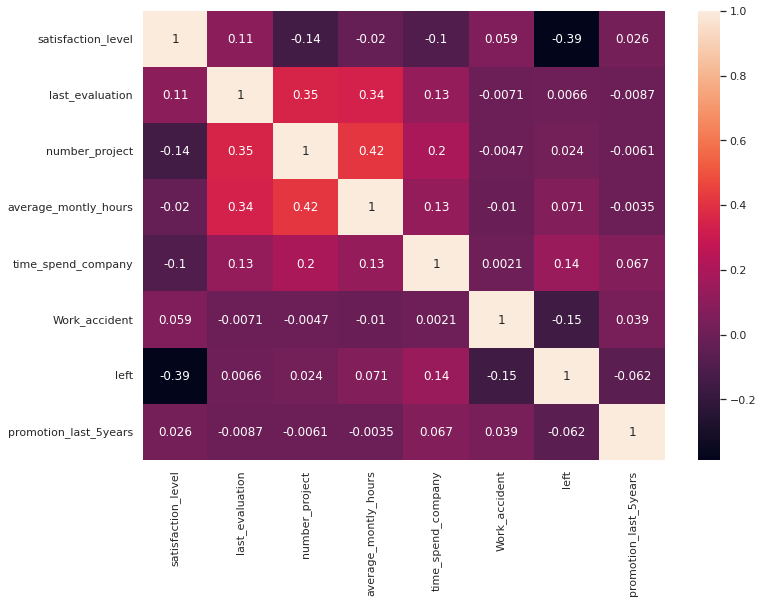

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(), annot=True)
# 2 наиболее скоррелированные переменные: "average_montly_hours" и "number_project"
# 2 наименее скоррелированные переменные: "work_accident" и "time_spend_company"

## 4. Рассчитаем сколько сотрудников работает в каждом департаменте

,Department,Employees
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


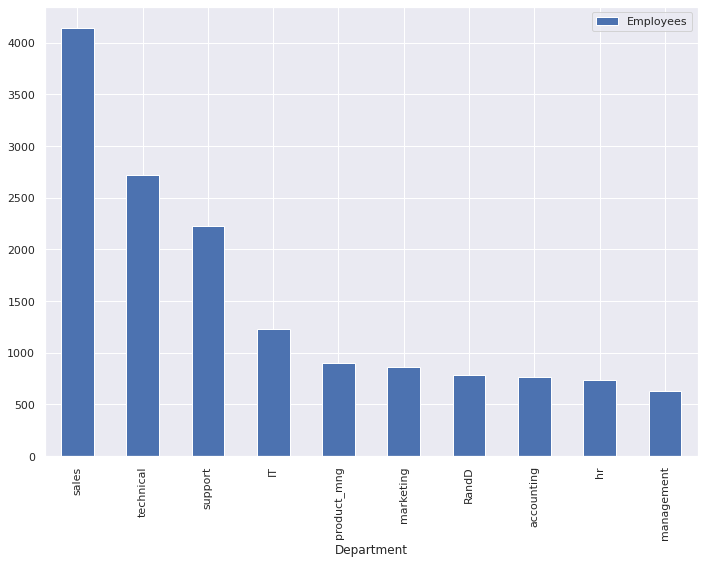

In [ ]:
data1 = data['department'].value_counts().to_frame()
data1 = data1.reset_index()
data1.columns = ['Department', 'Employees']
data1.plot(kind='bar', x='Department', y='Employees')
data1

## 5. Покажем распределение сотрудников по зарпалатам.

,salary,Employees
0,low,7316
1,medium,6446
2,high,1237


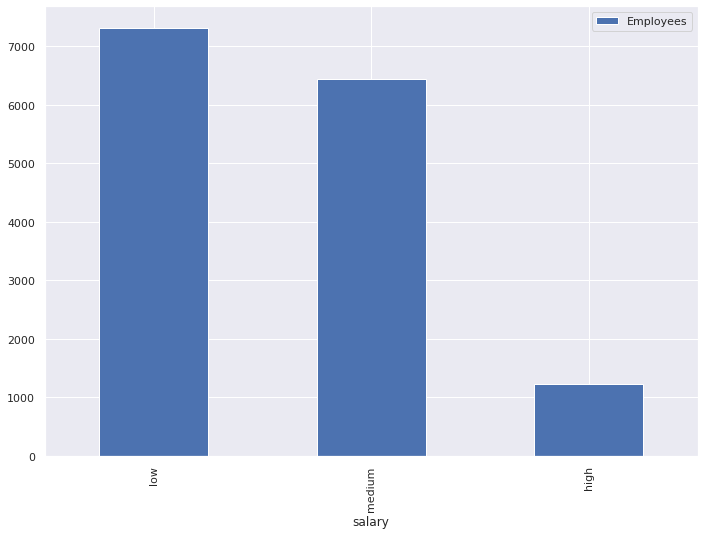

In [ ]:
data2 = data['salary'].value_counts().to_frame()
data2 = data2.reset_index()
data2.columns = ['salary', 'Employees']
data2.plot(kind='bar', x='salary', y='Employees')
data2

## 6. Покажем распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
data3 = data[['department', 'salary']].value_counts().to_frame()
data3 = data3.reset_index()
data3.columns = ['Department', 'Salary', 'Employees']
data3

,Department,Salary,Employees
0,sales,low,2099
1,sales,medium,1772
2,technical,low,1372
3,technical,medium,1147
4,support,low,1146
5,support,medium,942
6,IT,low,609
7,IT,medium,535
8,product_mng,low,451
9,marketing,low,402


## 7. Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [ ]:
# H0 нулевая гипотеза: Сотрудники с высоким и низким окладами проводят одинаковое количество времени (=).
# H1 альтернативная гипотеза: Сотрудники с высоким и низким окладами проводят на работе разное время (!=).

#Для несвязных выборок: scipy.stats.ttest_ind.

data_high = data[data['salary'] == 'high']['average_montly_hours']
data_low = data[data['salary'] == 'low']['average_montly_hours']

alpha = 0.05
result = st.ttest_ind(data_high, data_low, equal_var = False)
print(data_high.mean())
print(data_low.mean())
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Cотрудники с высоким и низким окладами проводят на работе разное время')
else:
    print('Не отвергаем нулевую гипотезу.')

199.86742118027485
200.9965828321487
Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу.


## 8. Рассчитаем следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
 - доля сотрудников с повышением за последние 5 лет;
 - средняя степень удовлетворенности;
 - среднее количество проектов

In [4]:
data.head(1)
data4 = data
data4.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [33]:
employees = data4['left'].count()
print(f'Количество сотрудников {employees}')

employees_fire_with_promotion = data4.query('left == 1 & promotion_last_5years == 1')['satisfaction_level'].count()
print(f'Количество уволившихся сотрудников с повышением {employees_fire_with_promotion}')

# Доля уволившихся сотрудников с повышением за посление 5 лет
score_fire = ((employees_fire_with_promotion / employees)*100).round(2)
print(f' Доля уволившихся сотрудников с повышением за последние 5 лет {score_fire}%')

# Cредняя степень удовлетворенности уволившихся сотрудников
employees_fire_satisfaction = round(data4.query('left == 1')['satisfaction_level'].mean(), 2)
print(f' Средняя степень удовлетворенности уволившихся сотрудников {employees_fire_satisfaction}')

# Среднее количество проектов у уволившихся сотрудников
employees_fire_sum_projects = (data4.query('left == 1')['number_project'].sum() / data4.query('left == 1')['number_project'].count()).round()

print(f' Среднee количество проектов у уволившихся сотрудников {employees_fire_sum_projects}')

Количество сотрудников 14999
Количество уволившихся сотрудников с повышением 19
 Доля уволившихся сотрудников с повышением за последние 5 лет 0.13%
 Средняя степень удовлетворенности уволившихся сотрудников 0.44
 Среднee количество проектов у уволившихся сотрудников 4.0


In [34]:
employees = data4['left'].count()
print(f'Количество сотрудников {employees}')

employees_with_promotion = data4.query('left == 0 & promotion_last_5years == 1')['satisfaction_level'].count()
print(f'Количество работающих сотрудников с повышением {employees_with_promotion}')

# Доля работающих сотрудников с повышением за посление 5 лет
score_ = ((employees_with_promotion / employees)*100).round(2)
print(f' Доля работающих сотрудников с повышением за последние 5 лет {score_}%')

# Cредняя степень удовлетворенности работающих сотрудников
employees_satisfaction = round(data4.query('left == 0')['satisfaction_level'].mean(), 2)
print(f' Средняя степень удовлетворенности работающих сотрудников {employees_satisfaction}')

# Среднее количество проектов у работающих сотрудников
employees_sum_projects = (data4.query('left == 0')['number_project'].sum() / data4.query('left == 0')['number_project'].count()).round()

print(f' Среднee количество проектов у работающих сотрудников {employees_sum_projects}')

Количество сотрудников 14999
Количество работающих сотрудников с повышением 300
 Доля работающих сотрудников с повышением за последние 5 лет 2.0%
 Средняя степень удовлетворенности работающих сотрудников 0.67
 Среднee количество проектов у работающих сотрудников 4.0


In [ ]:
# Если сравнивать 3 показателя по работающим и уволившимся сотрудникам, 
# то доля работающих сотрудников с повышением за последние 5 лет в разы больше, чем уволившихся (2% против 0,13%).
# при этом среднее количество проектов у этих сотрудников одинаковое (по 4 проекта), но у работающих сотрудников степень удовлетворенности выше.

## 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.

In [81]:
data1 = data.iloc[:, 0:8]
data_class = data1.left.to_numpy()

# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, data_class, test_size=0.25)

In [84]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [85]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [86]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

# Точность модели составляет примерно 77%

0.7722666666666667